In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), "../../"))

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import agreement_utils as calc
from itertools import combinations
from utilities.plots import set_plot_params
from readers.memo_ga import MEMOGroupAff

In [3]:
def load_labels():
    memodb = MEMOGroupAff()
    labels_df = pd.read_csv(memodb.labels_df_path)
    return labels_df, memodb.groups, memodb.sessions, memodb.emo_dims, memodb.annotators, memodb

In [4]:
labels_df, groups, sessions, emo_dims, annotators, memodb = load_labels()
labels_df = labels_df.loc[(labels_df['annotatorID'] != '6') & (labels_df['interactionID'] != '14_3')]

In [5]:
labels_df.head()

,Unnamed: 0,interactionID,groupID,sessionID,annotatorID,onsetTime,offsetTime,Arousal,Valence
0,0,4_1,4,1,6,0,15,3.0,5.0
1,1,4_1,4,1,6,15,30,6.0,6.0
2,2,4_1,4,1,6,30,45,5.0,6.0
3,3,4_1,4,1,6,45,60,6.0,6.0
4,4,4_1,4,1,6,60,75,5.0,6.0


In [6]:
# Read All Annotations
## Arousal - x axis
## Valence - y axis

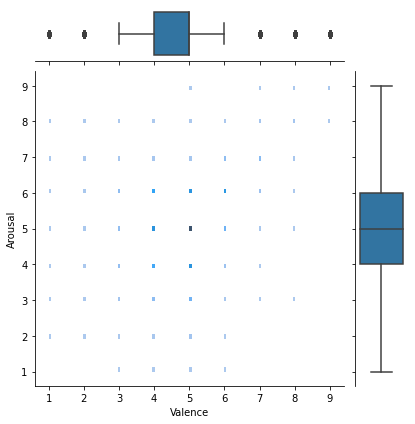

In [7]:
g = sns.JointGrid(data=labels_df, x="Valence", y="Arousal")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

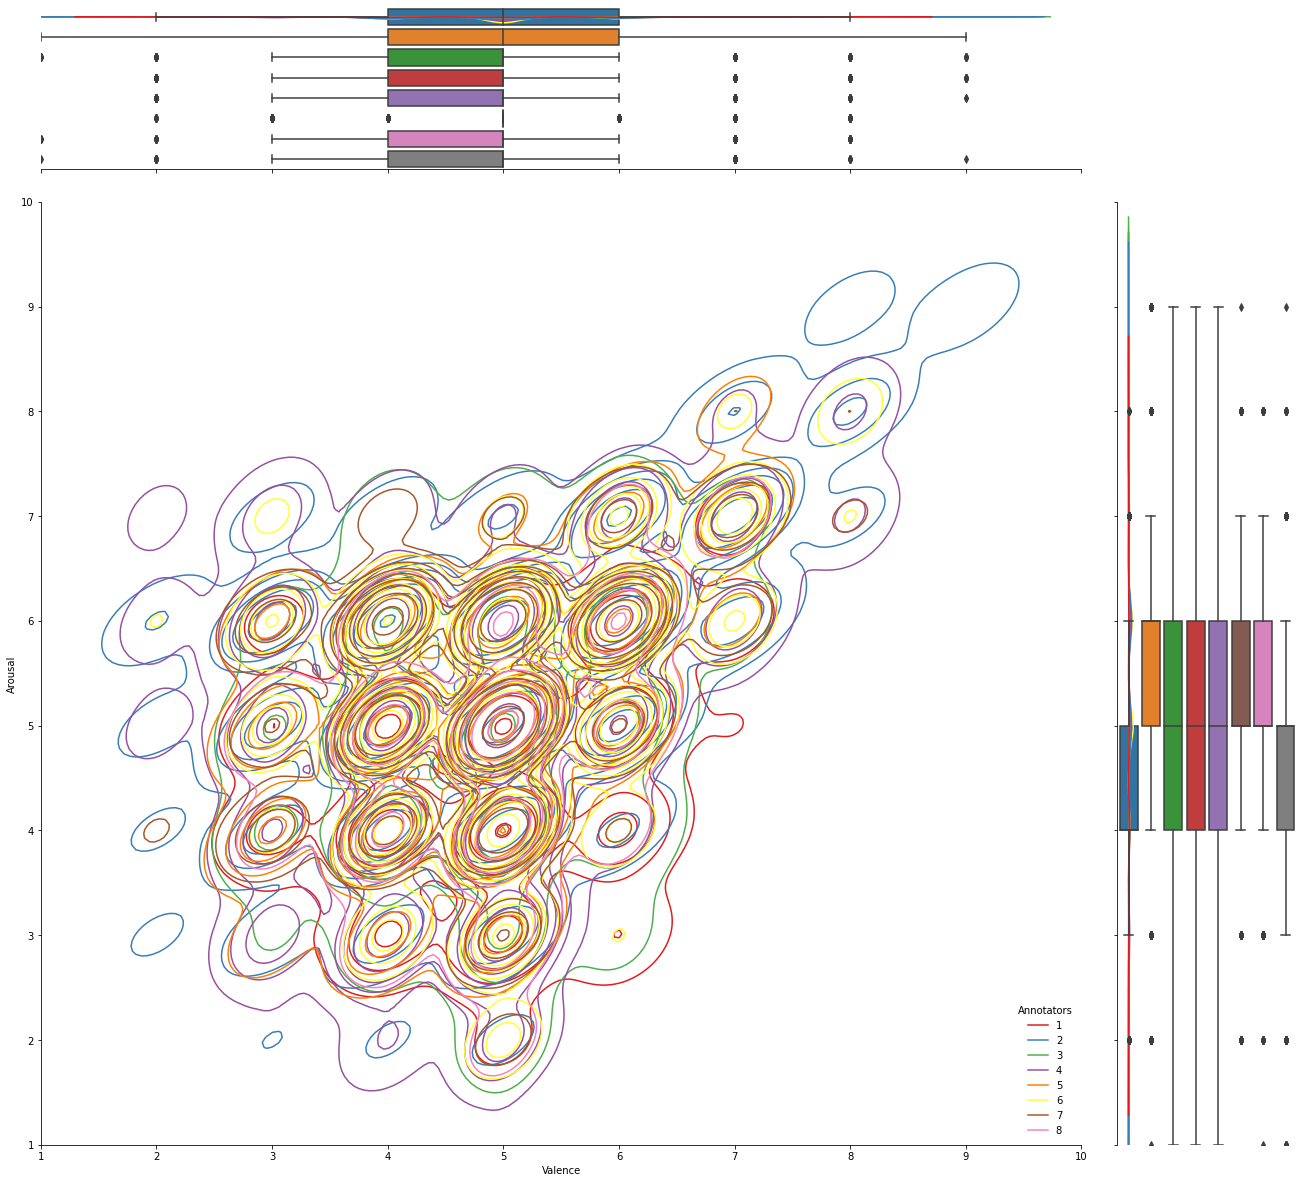

In [8]:
g = sns.jointplot(data=labels_df, x="Valence", y="Arousal", hue="annotatorID", palette="Set1", space=0.2, kind='kde', xlim = (1,10), ylim = (1,10))
# move the legend in ax_joint
sns.move_legend(g.ax_joint, "lower right", title='Annotators', frameon=False)

g.fig.set_size_inches(20, 18)

b1 = sns.boxplot(data=labels_df, x="Valence", y="annotatorID", orient='h', ax=g.ax_marg_x)
b1.set_ylabel('')
b1.set_xlabel('')
    
b2 = sns.boxplot(data=labels_df, y="Arousal", x="annotatorID", orient='v', ax=g.ax_marg_y)
b2.set_ylabel('')
b2.set_xlabel('')
set_plot_params(plt, figsize=(25, 25))
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

In [9]:
# Ground-truth Annotations
joint_labels_df = pd.read_csv(memodb.joint_gt_df_path)

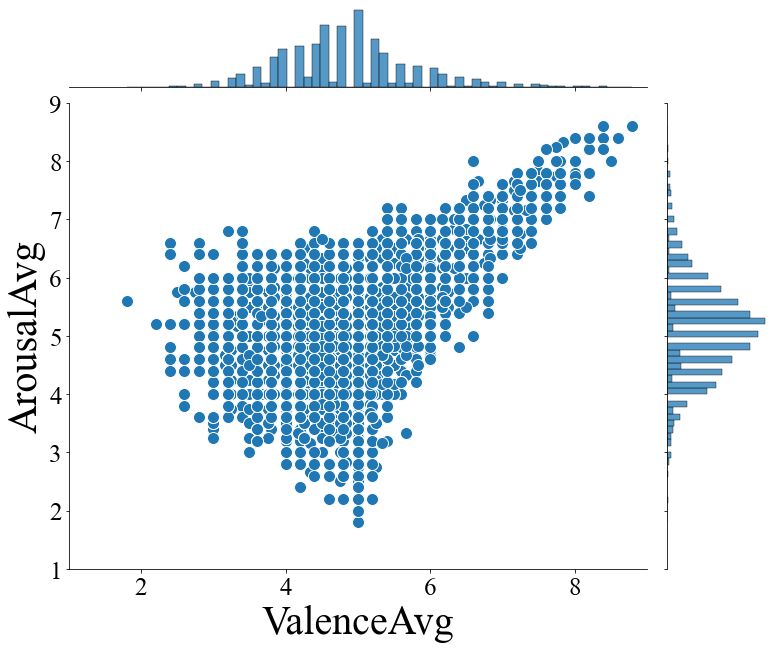

In [10]:
g = sns.jointplot(data=joint_labels_df, x="ValenceAvg", y="ArousalAvg", xlim = (1,9), ylim = (1,9))
g.fig.set_size_inches(12, 10)
set_plot_params(plt)
plt.show()

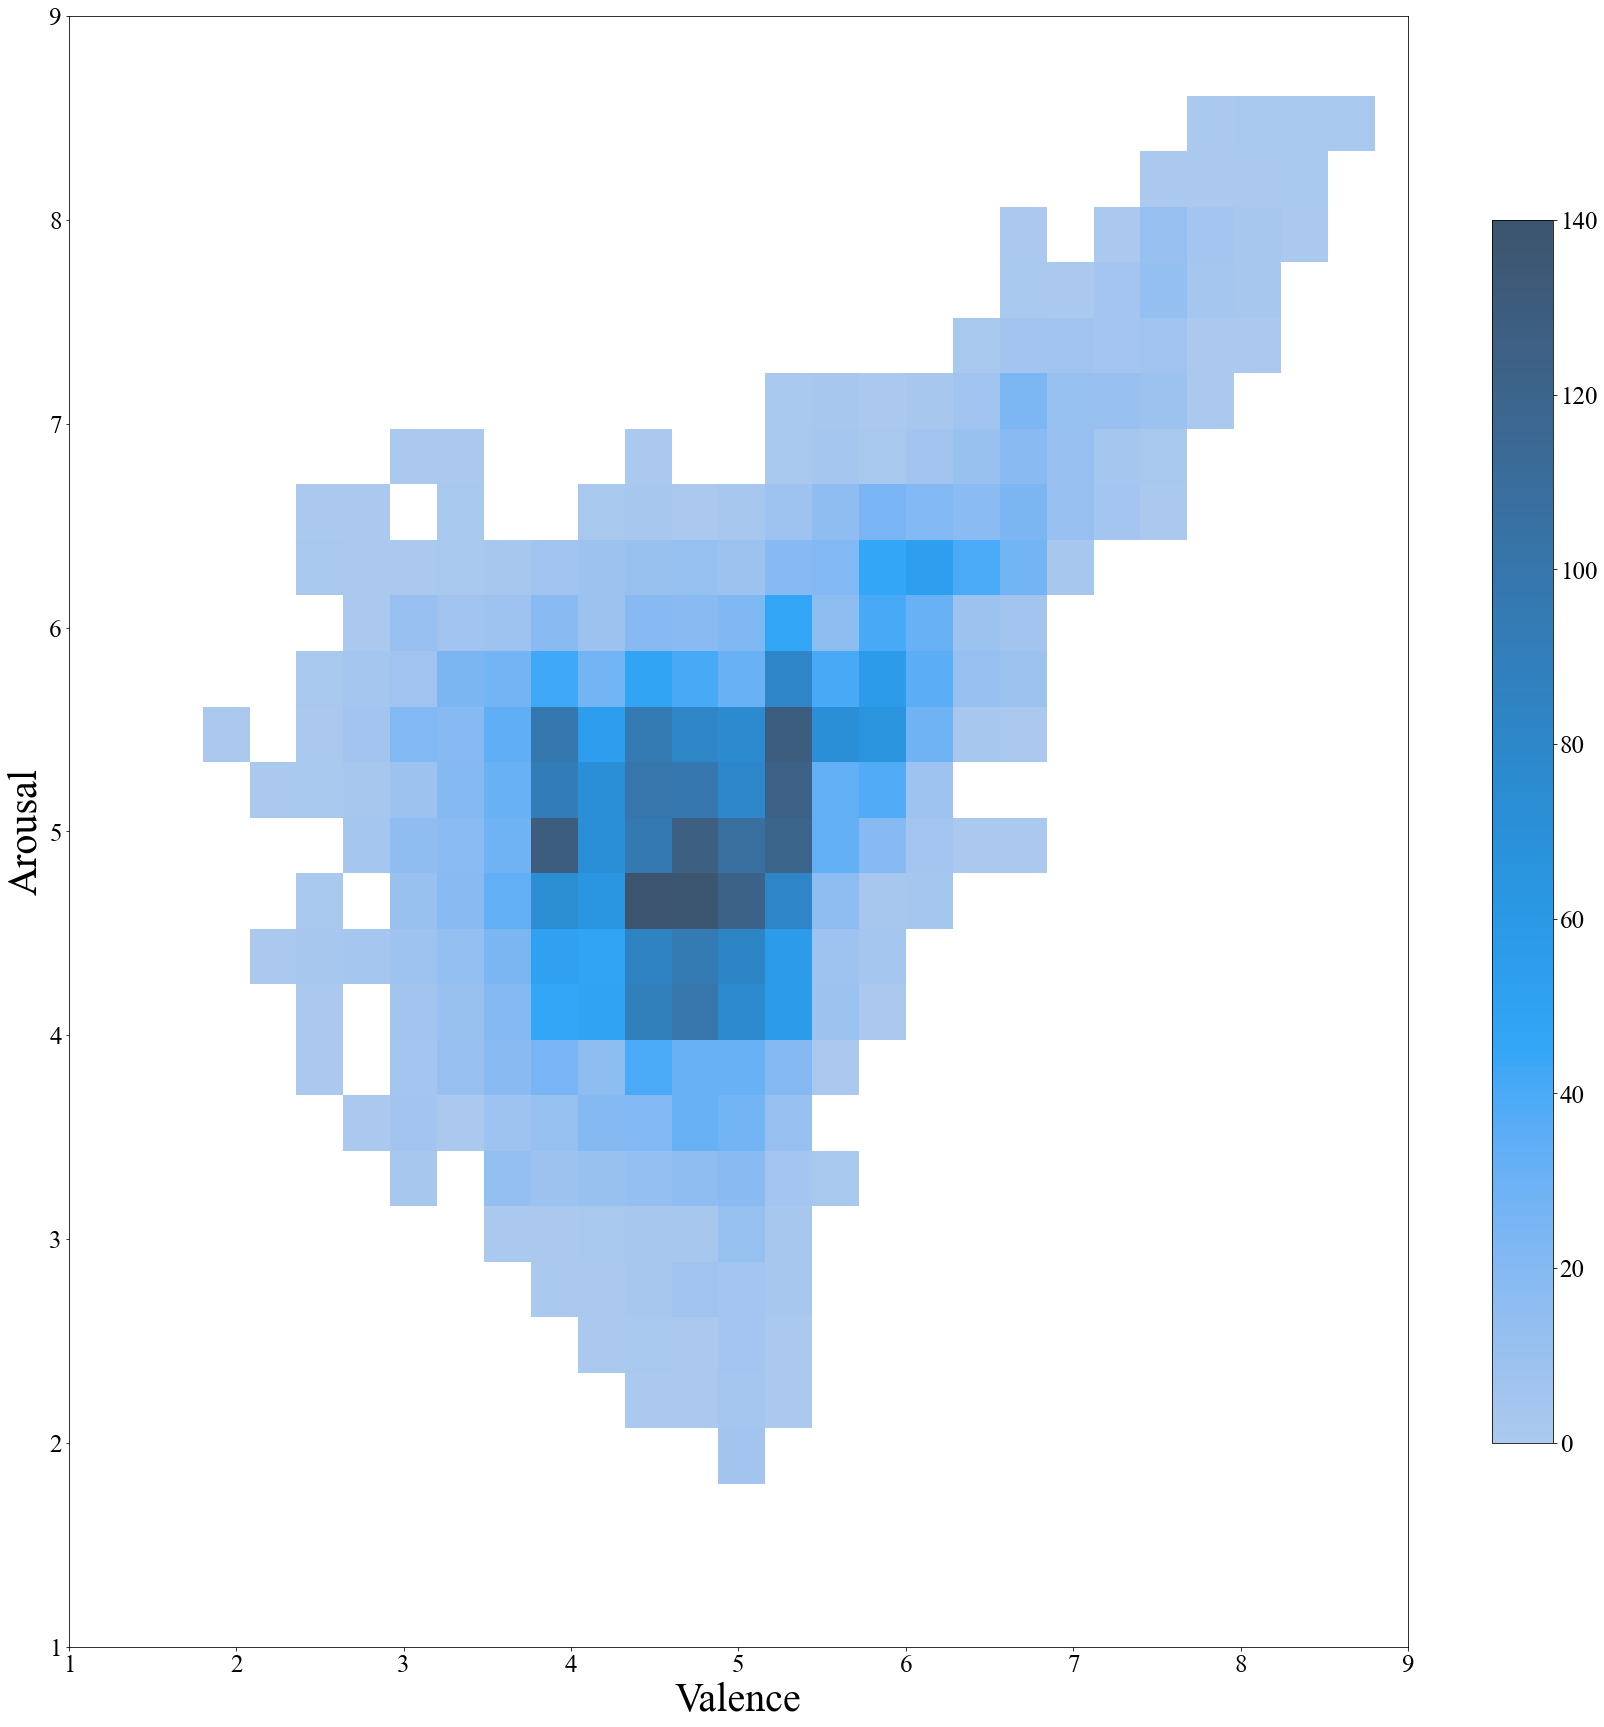

In [11]:

sns.histplot(
    joint_labels_df, x="ValenceGT", y="ArousalGT",
    bins=25, cbar=True, cbar_kws=dict(shrink=.75),
    kde=True, kde_kws={'bw_adjust':0.1}
)
# g.set_size_inches(12, 10)
set_plot_params(plt, figsize=(20, 15))
plt.ylabel("Arousal")
plt.xlabel("Valence")
plt.xlim((1, 9))
plt.ylim((1, 9))
plt.show()

In [12]:
joint_labels_df["ValenceGT"].values

array([4.6   , 5.8018, 5.3848, 5.4016, 5.6   , 5.6   , 5.8018, 5.8138,
       5.785 , 5.4136, 5.1984, 5.2152, 5.6   , 5.3848, 5.    , 5.4136,
       5.4136, 5.    , 6.2154, 5.6118, 5.6   , 4.5998, 5.3848, 5.6   ,
       4.9846, 5.    , 4.7982, 4.7982, 5.5864, 4.7863, 3.8016, 4.    ,
       4.7864, 5.6   , 5.029 , 3.8016, 3.5864, 3.7848, 3.9882, 4.0035,
       4.017 , 3.8018, 4.    , 7.017 , 4.215 , 5.2306, 4.6152, 4.2152,
       4.6322, 4.4136, 4.4136, 4.1982, 4.3966, 6.    , 4.7982, 4.1982,
       4.4   , 4.4422, 4.8016, 6.2152, 5.8018, 4.8016, 4.6152, 4.7982,
       3.8016, 3.1982, 4.    , 4.1984, 3.2018, 3.5864, 8.017 , 4.1982,
       3.8016, 5.1864, 4.4   , 3.3882, 3.8018, 3.6034, 3.8018, 3.5998,
       3.2018, 4.4016, 4.4171, 4.5698, 4.5746, 4.3594, 4.    , 3.8018,
       3.5864, 4.4   , 4.6118, 5.2032, 5.8018, 5.1744, 4.2018, 3.5864,
       4.417 , 3.5864, 4.3848, 4.4136, 4.5866, 4.4002, 4.2018, 4.6154,
       5.1866, 4.6154, 4.6154, 5.029 , 4.6154, 3.7848, 4.    , 4.1866,
      

/export/home/rajprabhu/anaconda3/envs/aer_phd/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


<Figure size 1080x1080 with 0 Axes>

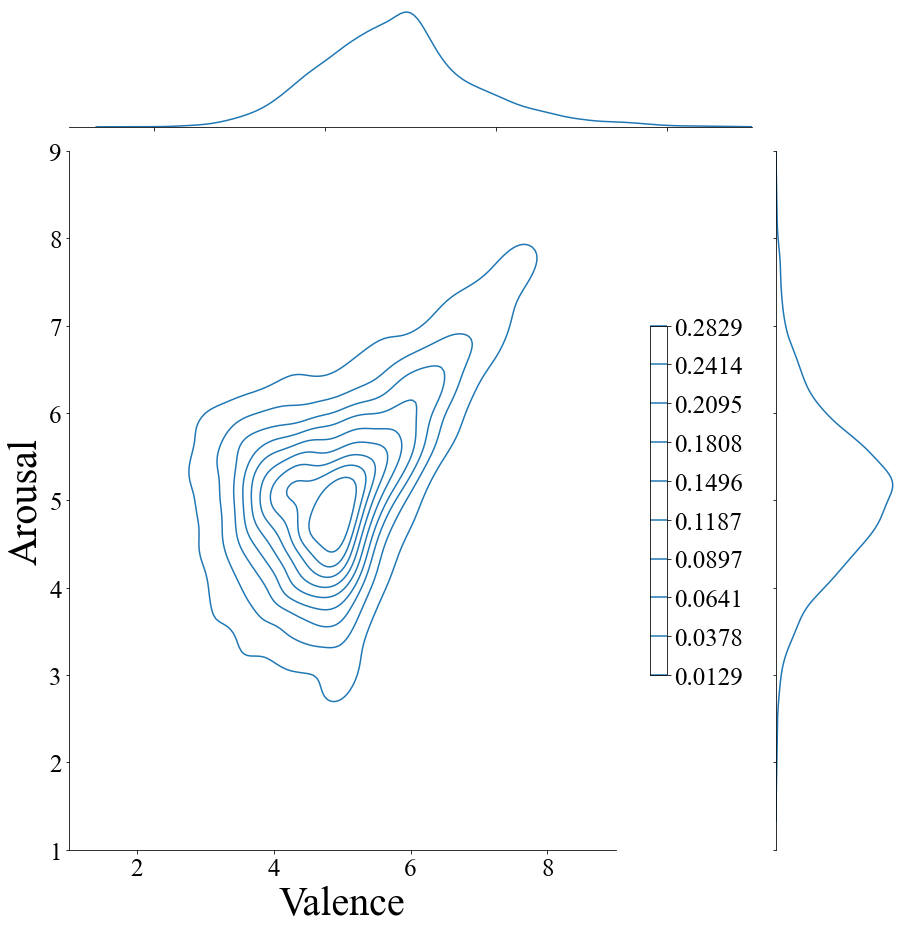

In [13]:
plt.figure(figsize=(15, 15))

# Custom the histogram:
# , marginal_kws=dict(bins=30, fill=True)
g = sns.jointplot(data=joint_labels_df, x="ValenceGT", y="ArousalGT",
              kind='kde', bins=20, cbar=True, cbar_kws=dict(shrink=.5))

g.fig.set_size_inches(15, 15)
set_plot_params(plt, figsize=(15, 15))
plt.ylabel("Arousal")
plt.xlabel("Valence")
plt.xlim((1, 9))
plt.ylim((1, 9))
plt.show()

/export/home/rajprabhu/anaconda3/envs/aer_phd/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


<Figure size 864x720 with 0 Axes>

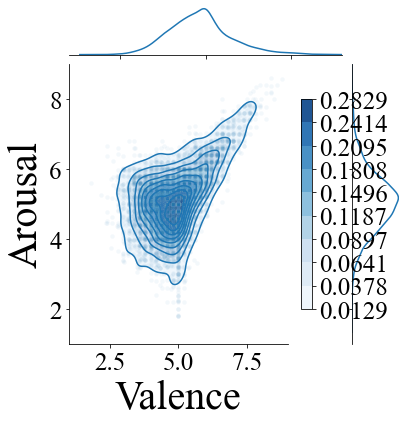

In [14]:
plt.figure(figsize=(12, 10))

sns.jointplot(data=joint_labels_df, x="ValenceGT", y="ArousalGT",
              kind='kde', bins=20, cbar=False, cbar_kws=dict(shrink=.5))

sns.kdeplot(x=joint_labels_df["ValenceGT"], y=joint_labels_df["ArousalGT"],
            cmap="Blues", fill=True, cbar=True, cbar_kws=dict(shrink=.75), alpha=0.9)

sns.scatterplot(x='ValenceGT', y='ArousalGT', data=joint_labels_df,
                s=20, c='#1f77b4', alpha=0.05)

set_plot_params(plt, figsize=(20, 20))
plt.ylabel("Arousal")
plt.xlabel("Valence")
plt.xlim((1, 9))
plt.ylim((1, 9))
plt.show()

In [15]:
import matplotlib.ticker as mtick

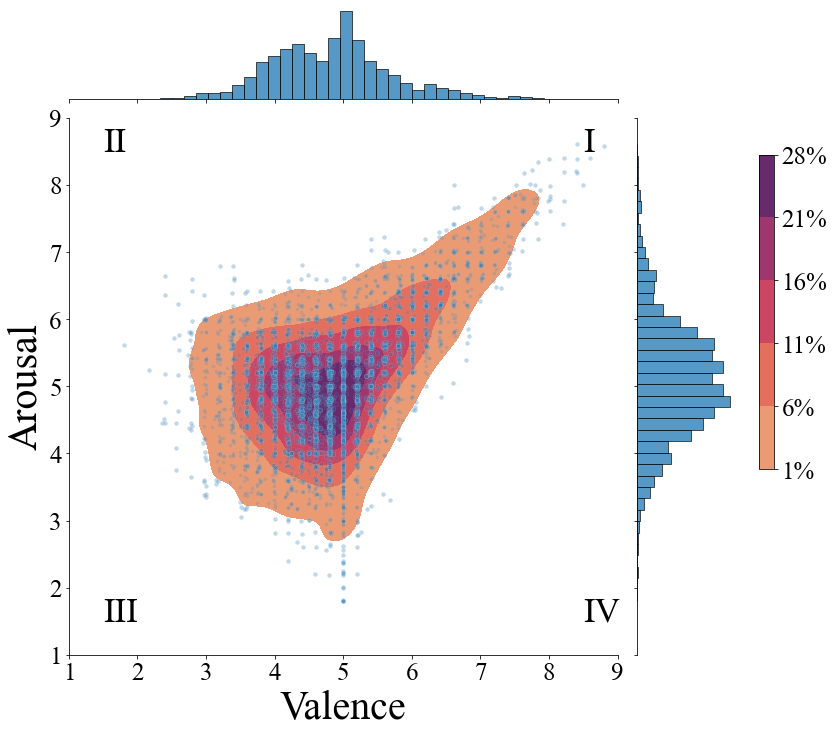

In [19]:
g = sns.jointplot(data=joint_labels_df, x="ValenceGT", y="ArousalGT", s=20, alpha=0.15, marginal_kws=dict(bins=40))
g.figure.set_size_inches(20, 15)
# cbar_ticks = [0, 25, 50, 75, 100]

s = g.plot_joint(sns.kdeplot, color="Spectral", zorder=1, levels=6, fill=True, thresh=0.05, cmap="flare", cbar=True, cbar_kws={'shrink':.45, 
                                                                                                                               'format': mtick.PercentFormatter(symbol='%', xmax=1., decimals=0),
                                                                                                                               "use_gridspec":False})
sns.scatterplot(x='ValenceGT', y='ArousalGT', data=joint_labels_df, s=20, c='#1f77b4', alpha=0.15)

# cb = s.figure.colorbar() #.set_ticklabels([1, 5, 10, 15, 20, 28])
plt.subplots_adjust(left=0.27, right=0.73, top=0.8, bottom=0.2)  # shrink fig so cbar is visible

# make new ax object for the cbar
# cbar_ax = s.figure.add_axes([.85, .25, .05, .4])  # x, y, width, height
# plt.colorbar(cax=cbar_ax)

plt.text(1.5, 8.5, r'II', fontsize=35)
plt.text(8.5, 8.5, r'I', fontsize=35)
plt.text(1.5, 1.5, r'III', fontsize=35)
plt.text(8.5, 1.5, r'IV', fontsize=35)

plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.xlim((1, 9))
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.ylim((1, 9))
set_plot_params(plt)

plt.savefig('groundtruth_final_dist.pdf', bbox_inches='tight')

plt.show()


In [17]:
print(np.mean(joint_labels_df["ArousalGT"]))
print(np.std(joint_labels_df["ArousalGT"]))
print(np.min(joint_labels_df["ArousalGT"]))
print(np.max(joint_labels_df["ArousalGT"]))


5.085798791645089
0.8828510626611782
1.7985
8.6093


In [18]:
print(np.mean(joint_labels_df["ValenceGT"]))
print(np.std(joint_labels_df["ValenceGT"]))
print(np.min(joint_labels_df["ValenceGT"]))
print(np.max(joint_labels_df["ValenceGT"]))

4.834886621784913
0.9018038934756235
1.7993
8.802
